# **1. Perkenalan Dataset**



Sumber Dataset :[Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

**About Dataset**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


**Feature**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP:
Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T
wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat,
Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [26]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [3]:
df = pd.read_csv(path+'/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#Cek Missing value
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
#Cek data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


Tidak terdapat missing value dan duplicated value

In [9]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('HeartDisease')
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

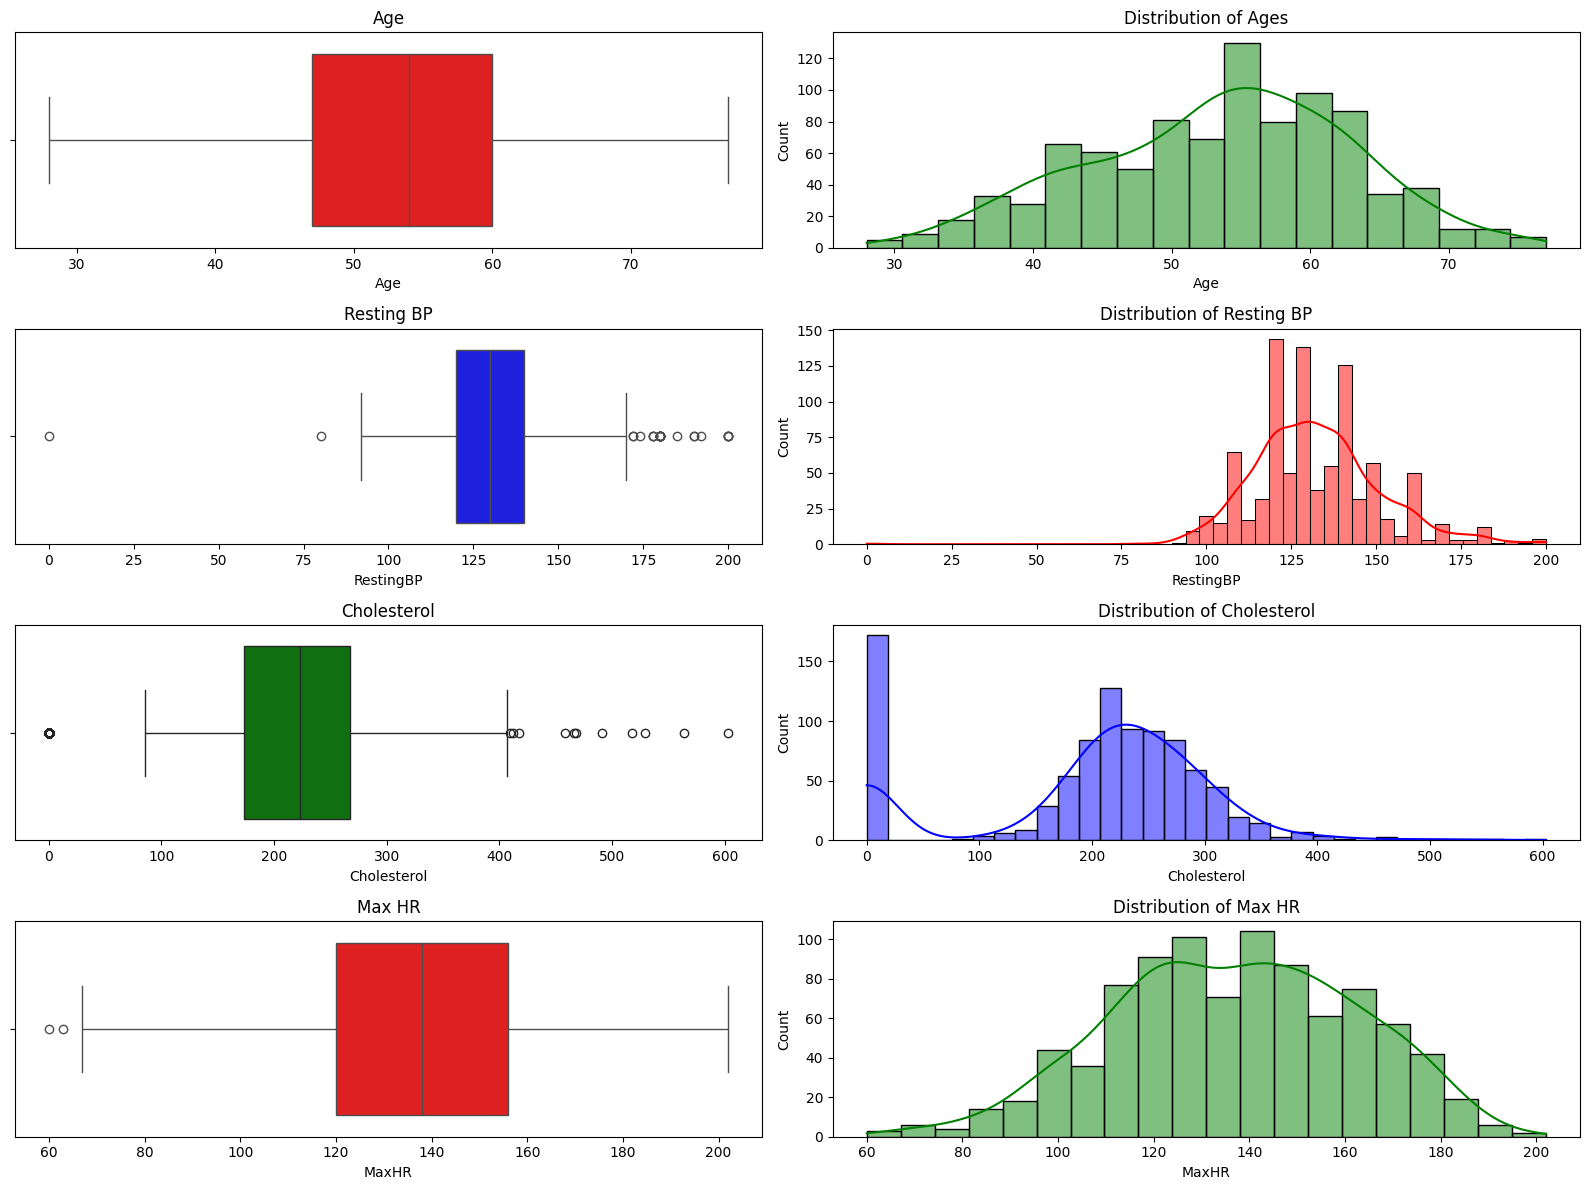

In [10]:
fig1, axes1 = plt.subplots(4, 2, figsize=(16, 12))
sns.boxplot( ax=axes1[0,0], x = df['Age'], color='r')
axes1[0,0].set_title('Age')
sns.histplot(ax=axes1[0,1], x = df['Age'],kde = True, color='g')
axes1[0,1].set_title('Distribution of Ages')
sns.boxplot(ax=axes1[1,0], x = df['RestingBP'], color='b')
axes1[1,0].set_title('Resting BP')
sns.histplot(ax=axes1[1,1], x = df['RestingBP'],kde = True, color='r')
axes1[1,1].set_title('Distribution of Resting BP')
sns.boxplot(ax=axes1[2,0], x = df['Cholesterol'], color='g')
axes1[2,0].set_title('Cholesterol')
sns.histplot(ax=axes1[2,1], x = df['Cholesterol'],kde = True, color='b')
axes1[2,1].set_title('Distribution of Cholesterol')
sns.boxplot(ax=axes1[3,0], x = df['MaxHR'], color='r')
axes1[3,0].set_title('Max HR')
sns.histplot(ax=axes1[3,1], x = df['MaxHR'],kde = True, color='g')
axes1[3,1].set_title('Distribution of Max HR')
plt.tight_layout()
plt.show()

Terlihat terdapat beberapa inaacurate value pada beberapa kolom seperti cholestrol dan restingbp akan tetapi pada kolom lainnya masih sesuai

Distribusi data seluruhnya cenderung normal

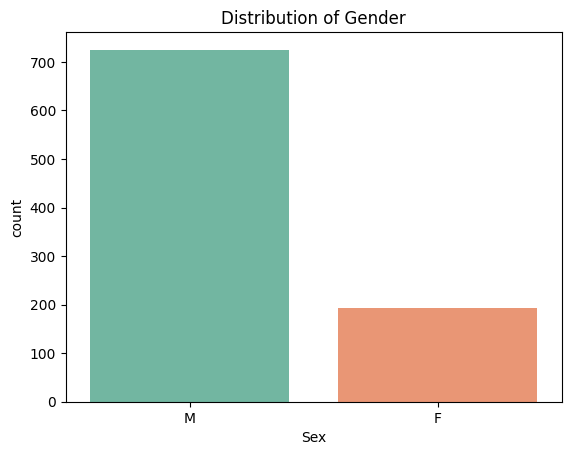

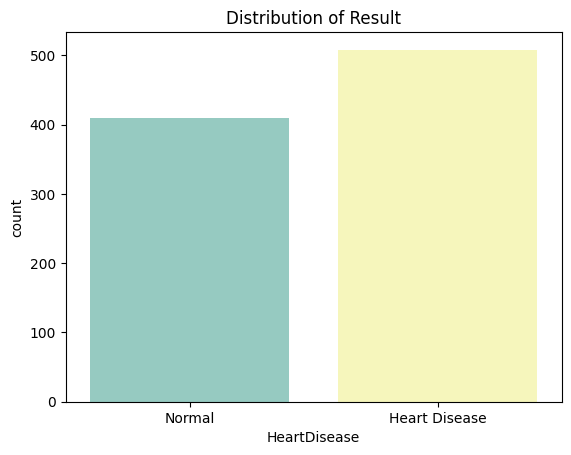

In [11]:
#Distribution of gender and result
sns.countplot(x='Sex', data=df, palette = 'Set2')
plt.title('Distribution of Gender')
plt.show()

sns.countplot(x='HeartDisease', data=df,palette = 'Set3')
plt.xticks([0, 1], ['Normal', 'Heart Disease'])
plt.title('Distribution of Result')
plt.show()

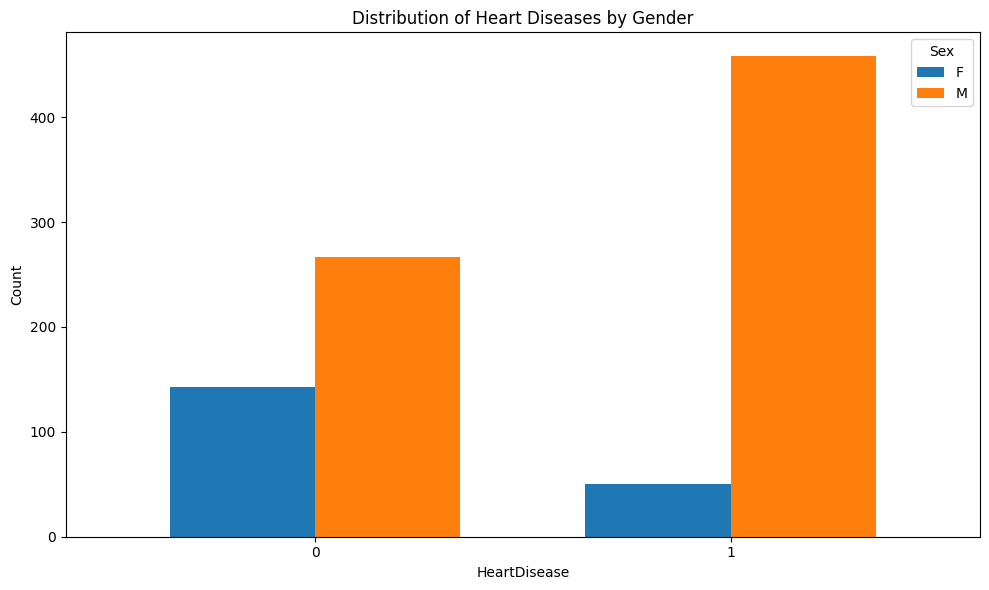

In [12]:
ct = pd.crosstab(df['HeartDisease'], df['Sex'])

# Plot bar berdampingan
ax = ct.plot(
    kind='bar',
    figsize=(10, 6),
    width=0.7
)

# Atur judul dan label
ax.set_title("Distribution of Heart Diseases by Gender")
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


Jenis kelamin pria mendominasi kemungkinan terkenanya penyakit jantung

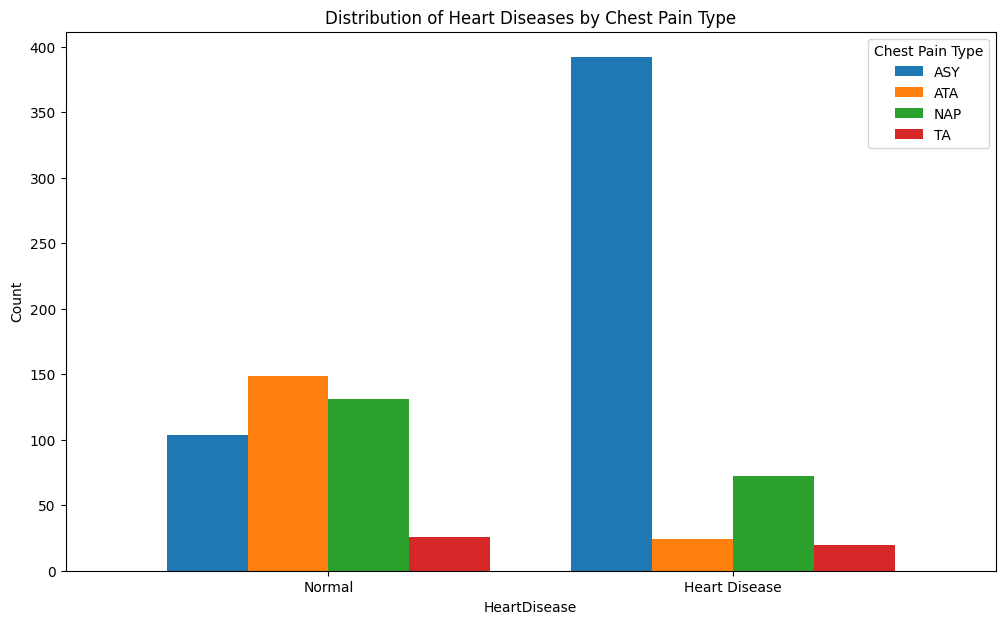

In [13]:
ct = pd.crosstab(df["HeartDisease"], df["ChestPainType"])

# Plot grouped bar
ax = ct.plot(
    kind="bar",
    figsize=(12, 7),
    width=0.8
)

# Custom tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Normal", "Heart Disease"])

# Label dan judul
ax.set_title("Distribution of Heart Diseases by Chest Pain Type")
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Count")
ax.legend(title="Chest Pain Type", loc="upper right")
plt.xticks(rotation=0)
plt.show()


orang dengan chest pain type ASY berkemungkinan besar memiliki penyakit jantung

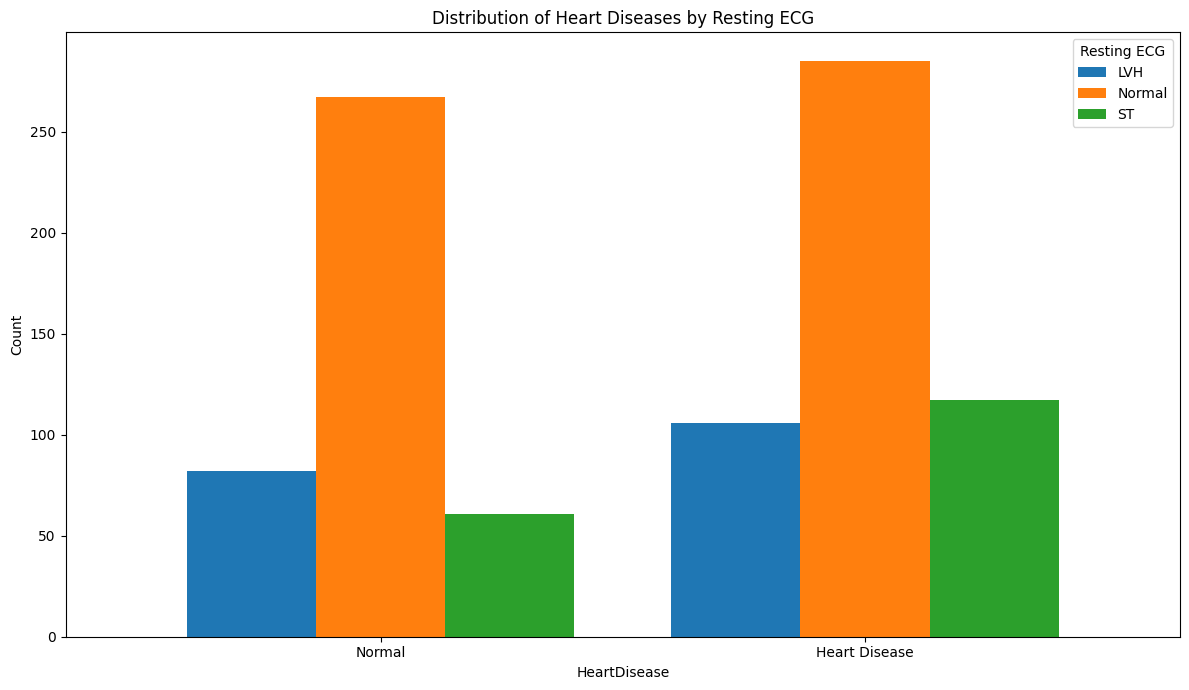

In [14]:
ct = pd.crosstab(df["HeartDisease"], df["RestingECG"])

# Plot grouped bar
ax = ct.plot(
    kind="bar",
    figsize=(12, 7),
    width=0.8
)

# Custom tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Normal", "Heart Disease"])

# Label dan judul
ax.set_title("Distribution of Heart Diseases by Resting ECG")
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Count")
ax.legend(title="Resting ECG", loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


REsting Ecg cenderung tidak ada perbedaan untuk orang normal dan memiliki penyakit jantung

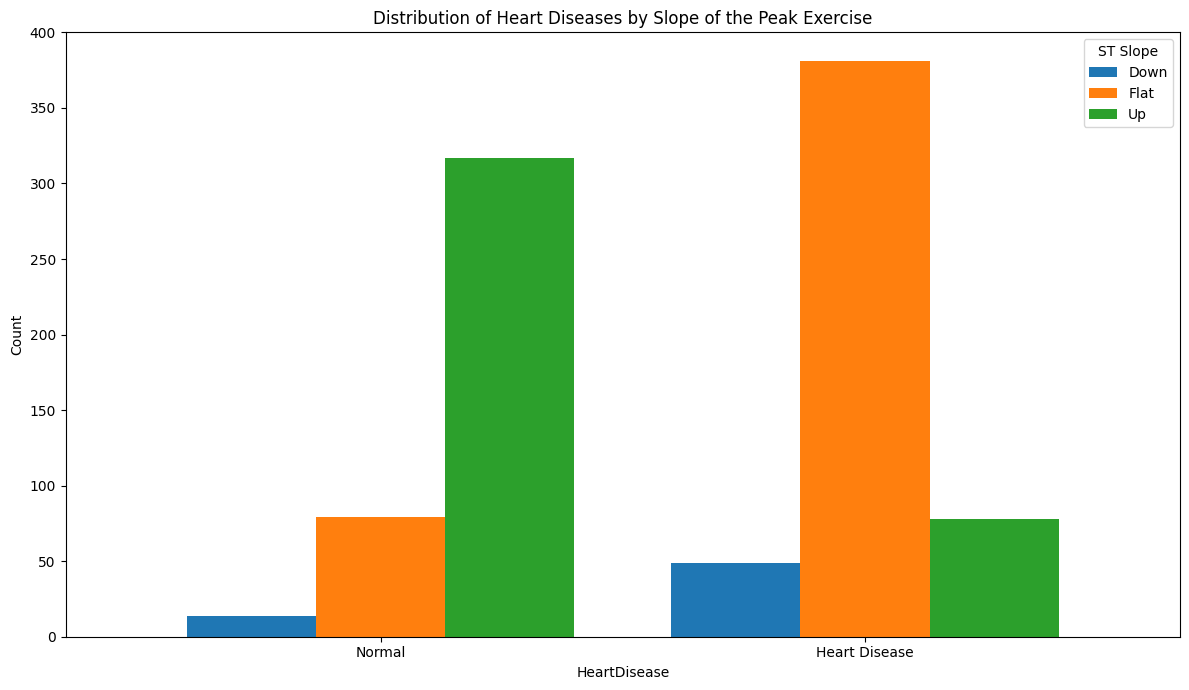

In [15]:
ct = pd.crosstab(df["HeartDisease"], df["ST_Slope"])

# Plot grouped bar
ax = ct.plot(
    kind="bar",
    figsize=(12, 7),
    width=0.8
    )

# Custom tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Normal", "Heart Disease"])

# Label dan judul
ax.set_title("Distribution of Heart Diseases by Slope of the Peak Exercise")
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Count")
ax.legend(title="ST Slope", loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Orang dengan peak exercise flat dan down memiliki penyakit jantung kebih besar terutama flat

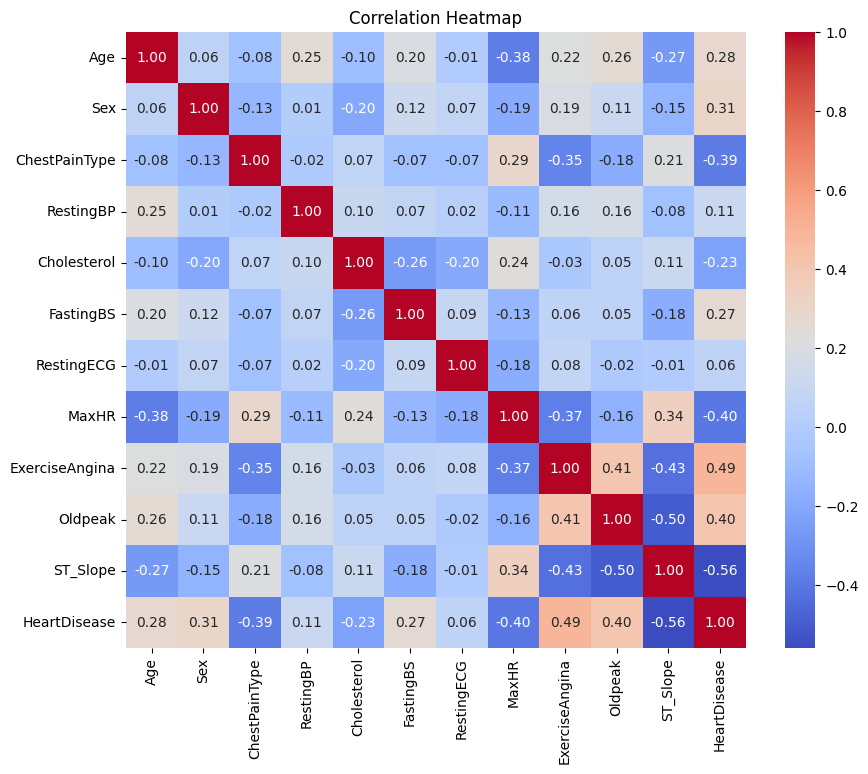

In [16]:
temp_df = df.copy()

le = LabelEncoder()
for col in categorical_features:
    temp_df[col] = le.fit_transform(temp_df[col])

plt.figure(figsize=(10, 8))
sns.heatmap(temp_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

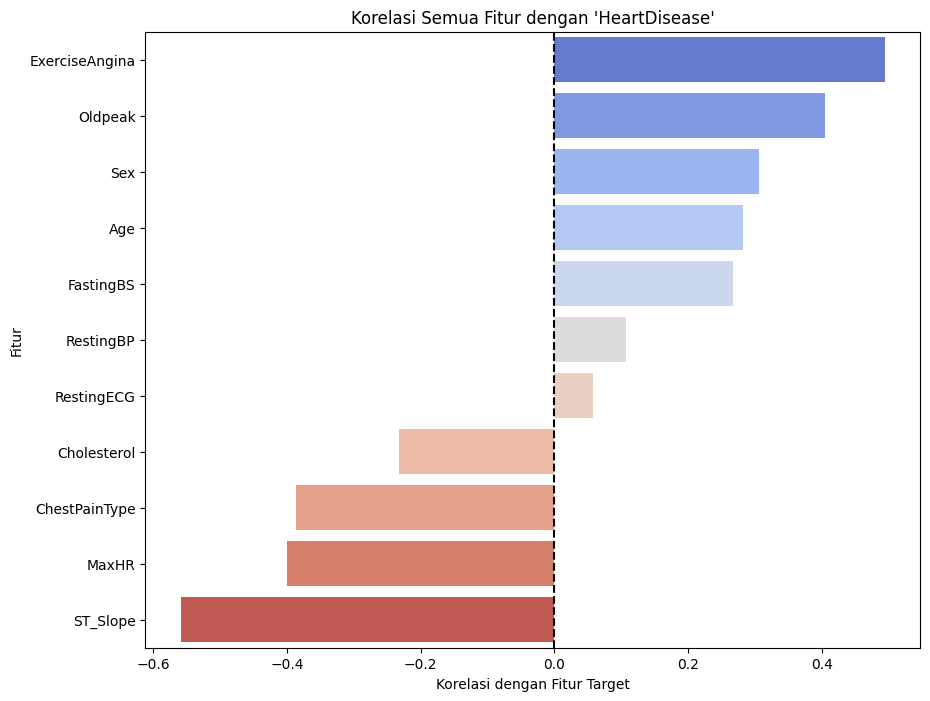

In [17]:

target_corr = temp_df.corr()['HeartDisease'].sort_values(ascending=False)
target_corr = target_corr.drop('HeartDisease')

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr , y=target_corr.index, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Korelasi dengan Fitur Target")
plt.ylabel("Fitur")
plt.title("Korelasi Semua Fitur dengan 'HeartDisease'")
plt.show()

Korelasi positif tertinggi ada pada Exercise angina sedangkan korelasi negatif tertinggi ada di ST_slope

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
df_clean = df.copy()

## Menagani inaccurate value


In [19]:
df_clean['Cholesterol'] = df_clean['Cholesterol'].replace(0, np.nan)
df_clean['RestingBP'] = df_clean['RestingBP'].replace(0, np.nan)
for col in numerical_features:
  df_clean[col].fillna(df_clean[col].mean(), inplace=True)

## Standarisasi feature

In [20]:
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])
df_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.414853,0.832529,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.527192,-1.212922,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.141317,0.719935,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.303619,-0.574892,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.971022,-0.931438,-0.551341,Normal,-0.581981,N,-0.832432,Up,0


## Encoding Data Categorical

In [21]:
for col in categorical_features:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])


    print(f"{col} mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Sex mapping: {'F': np.int64(0), 'M': np.int64(1)}
ChestPainType mapping: {'ASY': np.int64(0), 'ATA': np.int64(1), 'NAP': np.int64(2), 'TA': np.int64(3)}
RestingECG mapping: {'LVH': np.int64(0), 'Normal': np.int64(1), 'ST': np.int64(2)}
ExerciseAngina mapping: {'N': np.int64(0), 'Y': np.int64(1)}
ST_Slope mapping: {'Down': np.int64(0), 'Flat': np.int64(1), 'Up': np.int64(2)}


In [22]:
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.414853,0.832529,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.527192,-1.212922,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.141317,0.719935,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.303619,-0.574892,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.971022,-0.931438,-0.551341,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.253656,0.363389,-0.551341,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.637320,-0.968969,1.813758,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.141317,-2.132437,-0.551341,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.141317,-0.162048,-0.551341,0,1.461525,0,-0.832432,1,1


In [23]:
X=df_clean.drop(columns=['HeartDisease'])
y=df_clean['HeartDisease']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Save data hasil preprocessing
output_path = "dataset_preprocessing"
if not os.path.exists(output_path):
    os.makedirs(output_path)

X_train.to_csv(os.path.join(output_path, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(output_path, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(output_path, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(output_path, "y_test.csv"), index=False)